# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [14]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

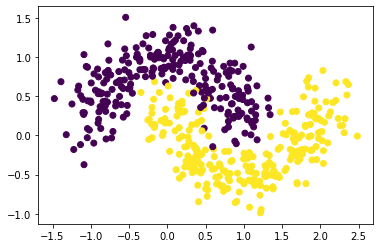

In [15]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

In [17]:
def plot_decisions(X, y, clf, title):
    gs = gridspec.GridSpec(1, 1)
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=X.shape[1])
    plt.title(title)
    plt.show()

In [18]:
lr = LogisticRegression(C=2, penalty='l2', solver='lbfgs')
svm = SVC(kernel='linear', C=2)

X, y = moons_points, moons_labels

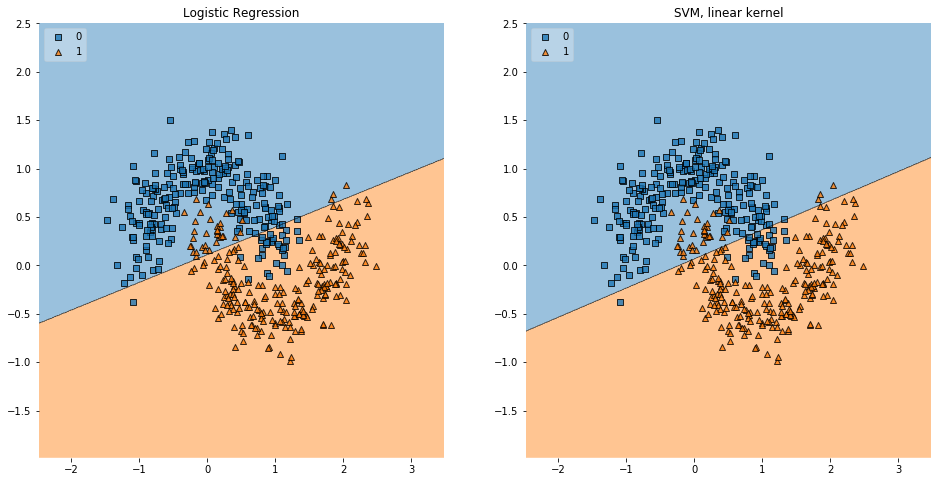

In [19]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 8))

lr.fit(X, y)
ax = plt.subplot(gs[0])
fig = plot_decision_regions(X=X, y=y, clf=lr, legend=2)
plt.title("Logistic Regression")

svm.fit(X, y)
ax = plt.subplot(gs[1])
fig = plot_decision_regions(X=X, y=y, clf=svm, legend=2)
plt.title("SVM, linear kernel")

plt.show()

In [20]:
svm_acc = accuracy_score(y, svm.predict(X))
svm_f1 = f1_score(y, svm.predict(X))
print(f"svm accuracy: {svm_acc}")
print(f"svm f1 score: {svm_f1}")

svm accuracy: 0.862
svm f1 score: 0.8606060606060605


In [21]:
lr_acc = accuracy_score(y, lr.predict(X))
lr_f1 = f1_score(y, lr.predict(X))
print(f"lr accuracy: {lr_acc}")
print(f"lr f1 score: {lr_f1}")

lr accuracy: 0.86
lr f1 score: 0.8588709677419355


**Conclusion:**
Both models are too simple to predict given data. The resulting delimiters are almost identical, however, svm parameters are a bit better.


## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [22]:
from sklearn.model_selection import GridSearchCV

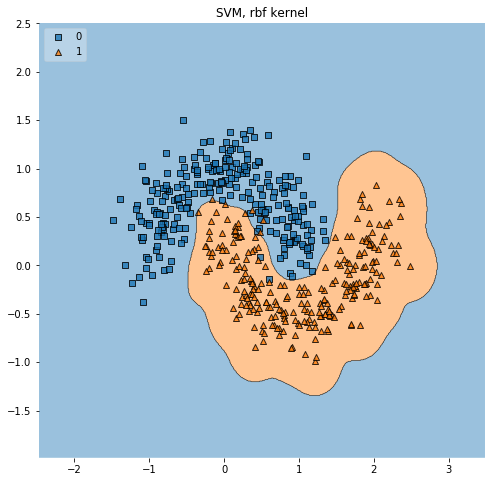

In [23]:
# rbf kernel
params = {'gamma': np.linspace(1e2, 10, 30)}
rbf = GridSearchCV(SVC(kernel='rbf'), params, cv=5)
rbf.fit(X, y)

plot_decisions(X=X, y=y, clf=rbf.best_estimator_, title='SVM, rbf kernel')

In [24]:
rbf.best_params_

{'gamma': 25.51724137931035}

In [25]:
y_pred = rbf.predict(X)
rbf_acc = accuracy_score(y, y_pred)
rbf_f1 = f1_score(y, y_pred)
print(f"rbf accuracy: {rbf_acc}")
print(f"rbf f1 score: {rbf_f1}")

rbf accuracy: 0.988
rbf f1 score: 0.9879518072289156


In [31]:
# poly kernel
params = {
    'degree': np.linspace(1, 6, 5),
    'coef0': np.linspace(10, 100, 30),
}
poly = GridSearchCV(SVC(kernel='poly', gamma='auto'), params, cv=5, verbose=True)         
poly.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'coef0': array([100.        ,  96.89655172,  93.79310345,  90.6...
        75.17241379,  72.06896552,  68.96551724,  65.86206897,
        62.75862069,  59.65517241,  56.55172414,  53.44827586,
        50.34482759,  47.24137931,  44.13793103,  41.03448276,
        37.93103448,  34.82758621,  31.72413793,  28.62068966,
        25.51724138,  22.4137931 ,  19.31034483,  16.20689655,
        13.10344828,  10.        ]),
                         'degree': array([1.  , 2.25, 3.5 , 4.75, 6.  ])},
             pre_dispatch='2*n_jobs', r

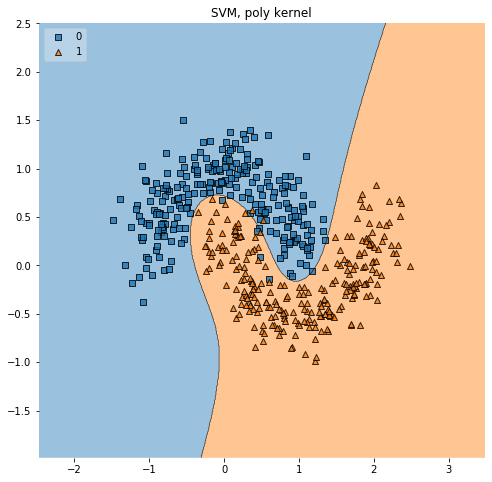

In [32]:
plot_decisions(X=X, y=y, clf=poly.best_estimator_, title='SVM, poly kernel')

In [33]:
poly.best_params_

{'coef0': 72.06896551724138, 'degree': 4.75}

In [34]:
y_pred = poly.predict(X)
poly_acc = accuracy_score(y, y_pred)
poly_f1 = f1_score(y, y_pred)
print(f"poly accuracy: {poly_acc}")
print(f"poly f1 score: {poly_f1}")

poly accuracy: 0.988
poly f1 score: 0.9880478087649401


In [41]:
# sigmoid kernel

params = {
    'gamma': np.linspace(0, 10, 10),
    'coef0': np.linspace(0, 50, 25)
}

sigm = GridSearchCV(SVC(kernel='sigmoid', gamma='auto'), params, cv=5)
sigm.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'coef0': array([  0.        ,   2.04081633,   4.08163265,   6.122...
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])},
             pre_dispatch='2*n_jobs', refit=T

In [42]:
sigm.best_params_

{'coef0': 18.367346938775512, 'gamma': 2.0408163265306123}

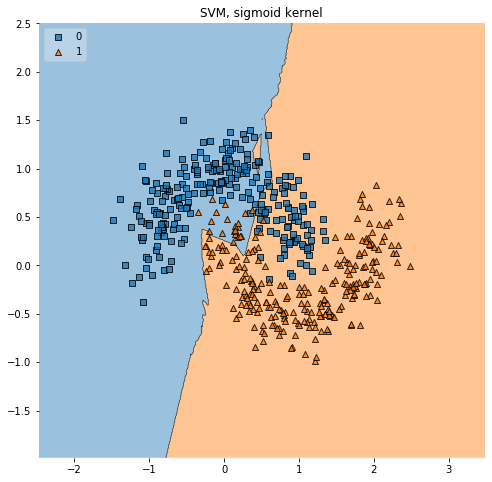

In [43]:
plot_decisions(X=X, y=y, clf=sigm.best_estimator_, title='SVM, sigmoid kernel')

In [44]:
y_pred = sigm.predict(X)
sigm_acc = accuracy_score(y, y_pred)
sigm_f1 = f1_score(y, y_pred)
print(f"sigm accuracy: {sigm_acc}")
print(f"sigm f1 score: {sigm_f1}")

sigm accuracy: 0.792
sigm f1 score: 0.8149466192170818


**Conclusion**
* The classification quality boosts when using kernel tricks.
* For each kernel, the decision border became non-linear.
* Degree 4.5 appered to be the most optimal for poly kernel.
* The best kernel for our problem appeared to be the poly kernel.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [63]:
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree), LogisticRegression(solver='saga', max_iter=10000))

params = {
    'polynomialfeatures__degree': np.arange(10),
}

clf = GridSearchCV(PolynomialRegression(), params, cv=5)
clf.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                             

In [64]:
clf.best_params_

{'polynomialfeatures__degree': 4}

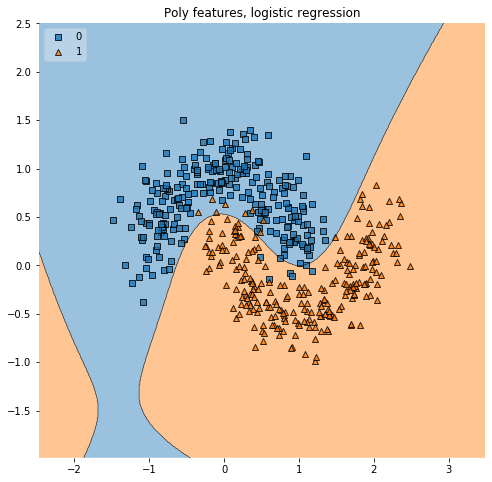

In [65]:
plot_decisions(X=X, y=y, clf=clf, title='Poly features, logistic regression')

In [68]:
y_pred = clf.predict(X)
print(f"accuracy: {accuracy_score(y, y_pred)}")
print(f"f1: {f1_score(y, y_pred)}")

accuracy: 0.968
f1: 0.9678714859437753


**Conclusion**
* PolinomialFeatures works a little bit worse comparing to SVM with poly kernel. The desicion borders are similar.
* I've used degree 4, the same as with poly kernel SVM.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

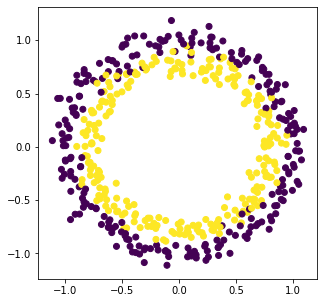

In [71]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
X, y = circles_points, circles_labels

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

In [72]:
# poly kernel
params = {
    'degree': np.linspace(1, 6, 5),
    'coef0': np.linspace(10, 100, 30),
}
poly = GridSearchCV(SVC(kernel='poly', gamma='auto'), params, cv=5, verbose=True)         
poly.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  9.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'coef0': array([ 10.        ,  13.10344828,  16.20689655,  19.31...
        34.82758621,  37.93103448,  41.03448276,  44.13793103,
        47.24137931,  50.34482759,  53.44827586,  56.55172414,
        59.65517241,  62.75862069,  65.86206897,  68.96551724,
        72.06896552,  75.17241379,  78.27586207,  81.37931034,
        84.48275862,  87.5862069 ,  90.68965517,  93.79310345,
        96.89655172, 100.        ]),
                         'degree': array([1.  , 2.25, 3.5 , 4.75, 6.  ])},
             pre_dispatch='2*n_jobs', 

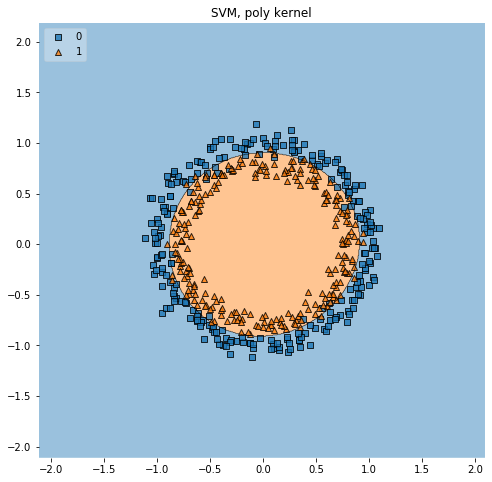

In [73]:
plot_decisions(X=X, y=y, clf=poly.best_estimator_, title='SVM, poly kernel')

In [74]:
y_pred = poly.predict(X)
print(f"accuracy: {accuracy_score(y, y_pred)}")
print(f"f1: {f1_score(y, y_pred)}")

accuracy: 0.938
f1: 0.9388560157790926


In [75]:
poly.best_params_

{'coef0': 41.03448275862069, 'degree': 4.75}

And even more:

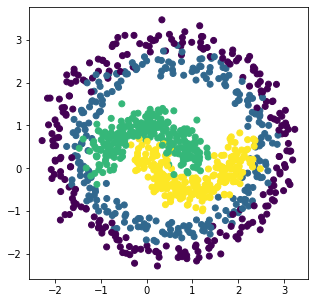

In [79]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes
X, y = points, labels

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [80]:
# poly kernel
params = {
    'degree': np.linspace(0, 5, 5),
    'coef0': np.linspace(30, 70, 10),
}
poly = GridSearchCV(SVC(kernel='poly', gamma='auto'), params, cv=3, verbose=True)         
poly.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'coef0': array([30.        , 34.44444444, 38.88888889, 43.33333333, 47.77777778,
       52.22222222, 56.66666667, 61.11111111, 65.55555556, 70.        ]),
                         'degree': array([0.  , 1.25, 2.5 , 3.75, 5.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

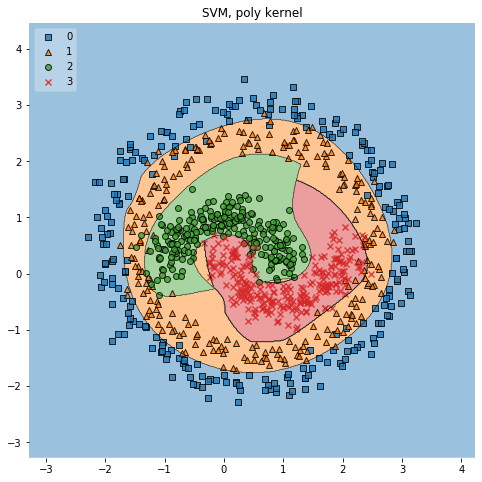

In [81]:
plot_decisions(X=X, y=y, clf=poly.best_estimator_, title='SVM, poly kernel')

In [83]:
y_pred = poly.predict(X)
print(f"accuracy: {accuracy_score(y, y_pred)}")
print(f"f1: {f1_score(y, y_pred, average='micro')}")
print(poly.best_params_)


accuracy: 0.941
f1: 0.941
{'coef0': 30.0, 'degree': 5.0}


**Conclusion**

Looks like polynomial kernel works with even complicated dtasets with good accuracy.